In [5]:
from pymna import Circuit
from pymna.units import kOhm,uF, V, Hz
from pymna.simulator import Simulator
import matplotlib.pyplot as plt
import os

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%matplotlib ipympl
%autoreload 2
basepath = os.getcwd()
print(basepath)

/Users/jodafons/Desktop/pymna/examples


In [152]:

circuit = Circuit()
circuit.SinusoidalVoltageSource('in', circuit.gnd, 
                                amplitude=1, 
                                frequency=1000, 
                                number_of_cycles=1, 
                                dc=0,
                                angle=90,
                                name='Vsin')


circuit.Diode('in','out',name='D1')
circuit.R('out',circuit.gnd,1*kOhm, name='RL')
circuit.C('out',circuit.gnd, 1e-5)

simulator = Simulator()
r = simulator.transient( circuit , 100, 0.001)



Transient simulation started with end_time=10, step_time=0.001
max_number_of_internal_step=1, max_tolerance=0.0001
Max number of nodes: 2


In [153]:
r.keys()

dict_keys(['t', '1', '2', 'J3Vsin'])

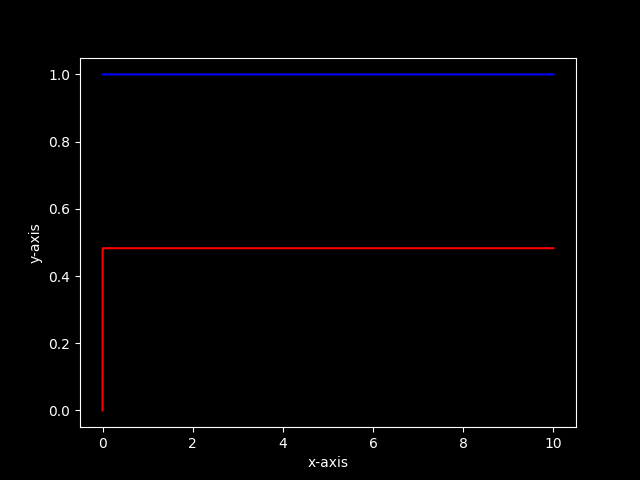

In [154]:
plt.style.use('dark_background')

fig, ax = plt.subplots()
plt.plot( r['t'], r['1'], color='blue' )
plt.plot( r['t'], r['2'], color='red' )

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title("")

plt.show()